<center>
  <img src="https://www.inteli.edu.br/wp-content/uploads/2022/04/28103439/Logo-Container.png" />
</center>

# `[SI10-2024-P1]` - Prova Prática

Sistemas de Informação - Módulo 10 - Turma 4



**Nome**: *Camila Anacleto*

**ANTES DE PROSSEGUIR FAÇA UMA CÓPIA DESTE NOTEBOOK**

----

## Contexto

Uma plataforma online, que atua na venda de produtos, deseja otimizar sua interface para melhorar a experiência do usuário e aumentar as taxas de conversão. Recentemente, a empresa implementou um redesign de sua página web, e os registros dessa mudança estão detalhados nos dados coletados desde então. As variáveis registradas diariamente incluem o número de visitantes únicos, sessões, taxa de rejeição, páginas por sessão, principais origens do tráfego, tipos de dispositivos usados, eventos ocorridos, taxa de conversão e o tempo médio de sessão.

Com base nesses dados, a empresa considera realizar uma mudança similar para otimizar ainda mais sua plataforma. Antes de proceder, a equipe deseja empregar simulações de Monte Carlo para avaliar os possíveis impactos de um novo redesign na taxa de conversão, tempo médio de sessão e taxa de rejeição, utilizando análises estatísticas para prever tendências futuras e ajustar estratégias de maneira informada. Essa abordagem visa garantir que as decisões tomadas maximizem as taxas de conversões, fundamentais para o sucesso contínuo da plataforma.

## Importação do dataset e das bibliotecas

In [111]:
# Importação do dataset
# https://drive.google.com/file/d/1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr/view?usp=drive_link
!gdown 1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr

Downloading...
From: https://drive.google.com/uc?id=1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr
To: /content/ITL-SI10-2024-P1-dataset.csv
100% 7.03k/7.03k [00:00<00:00, 22.6MB/s]


In [112]:
# Importação das bibliotecas
import pandas as pd

# Transforma o dataset em DataFrame Pandas
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')
print(df.head())

         Data  Visitantes Únicos  Sessões  Taxa de Rejeição (%)  \
0  2023-01-01              113.0    126.0             50.496714   
1  2023-01-02               90.0    157.0             49.438007   
2  2023-01-03               92.0    185.0             49.800231   
3  2023-01-04              130.0    206.0             50.251843   
4  2023-01-05              123.0    155.0             48.070931   

   Páginas por Sessão Principais Origens do Tráfego Dispositivos  Eventos  \
0            1.834201                        Direto      Desktop        8   
1            1.955760                        Social      Desktop        5   
2            2.285052                        Direto      Desktop        9   
3            2.325464                          Pago       Mobile        6   
4            2.267006                        Direto      Desktop        6   

   Taxa de Conversão (%)  Tempo Médio de Sessão (minutos)  
0               1.952083                         5.395516  
1             

## Questões

### Questão 1

**Análise Exploratória de Dados**: Faça a exploração dos dados, utilizando gráficos interativos. Identifique correlações entre as variáveis e apresente essas relações em uma matriz de correlação focada nas variáveis mais relevantes para a conversão de vendas.

In [ ]:
# Escreva sua resposta nesta seção (Você pode criar quantas células de texto e de código forem necessárias)

In [113]:
#Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import plotly.express as px
import seaborn as sns

In [114]:
#Entendendo os dados
print(df.shape)
print(df.head())
print(df.columns)
print(df.info())

(60, 10)
         Data  Visitantes Únicos  Sessões  Taxa de Rejeição (%)  \
0  2023-01-01              113.0    126.0             50.496714   
1  2023-01-02               90.0    157.0             49.438007   
2  2023-01-03               92.0    185.0             49.800231   
3  2023-01-04              130.0    206.0             50.251843   
4  2023-01-05              123.0    155.0             48.070931   

   Páginas por Sessão Principais Origens do Tráfego Dispositivos  Eventos  \
0            1.834201                        Direto      Desktop        8   
1            1.955760                        Social      Desktop        5   
2            2.285052                        Direto      Desktop        9   
3            2.325464                          Pago       Mobile        6   
4            2.267006                        Direto      Desktop        6   

   Taxa de Conversão (%)  Tempo Médio de Sessão (minutos)  
0               1.952083                         5.395516  
1    

In [115]:
df.describe()

,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,301.133333,449.450000,34.230939,4.007533,5.300000,4.499632,10.045957
std,120.896295,182.619121,10.164913,1.156751,2.109703,1.486718,3.413248
min,90.000000,126.000000,20.177732,1.834201,1.000000,1.952083,4.680899
25%,196.500000,298.750000,24.860077,3.078881,3.750000,3.329572,6.915095
50%,319.500000,456.000000,34.381987,4.027289,5.000000,4.530517,10.039833
75%,401.250000,616.000000,43.013749,4.890745,6.250000,5.748005,13.282681
max,517.000000,769.000000,50.496714,5.996747,10.000000,7.075193,16.360085


In [116]:
df['Data'] = pd.to_datetime(df['Data'])

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline

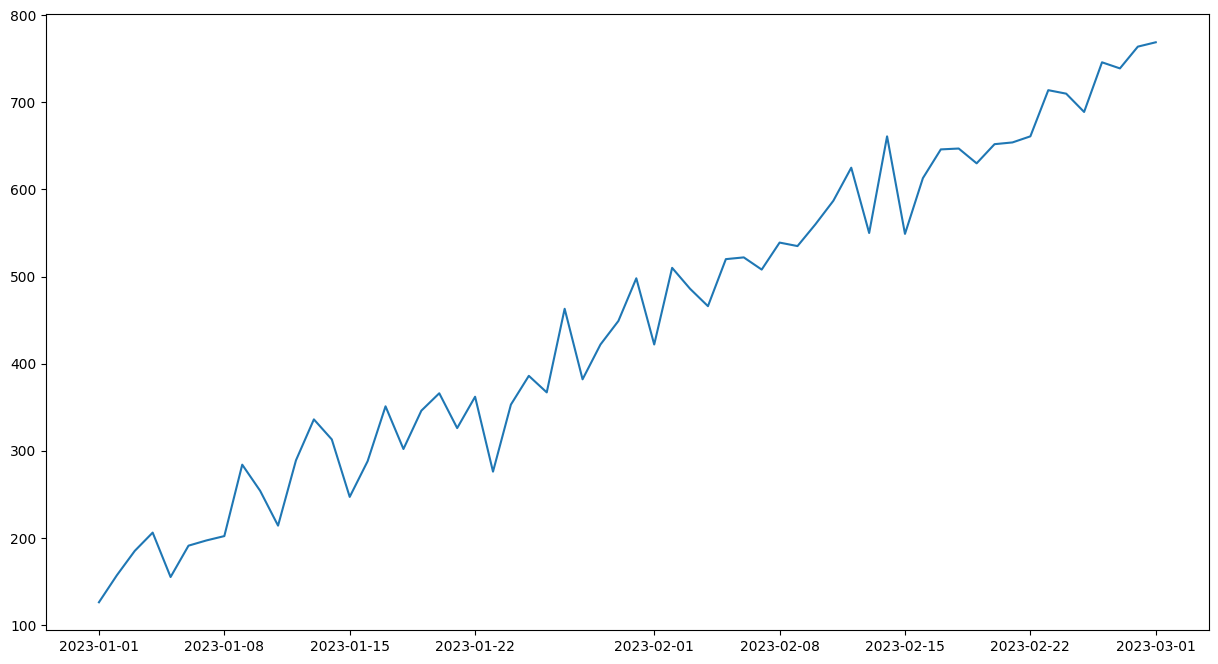

In [118]:
plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])
plt.plot(df['Data'], df['Sessões'])

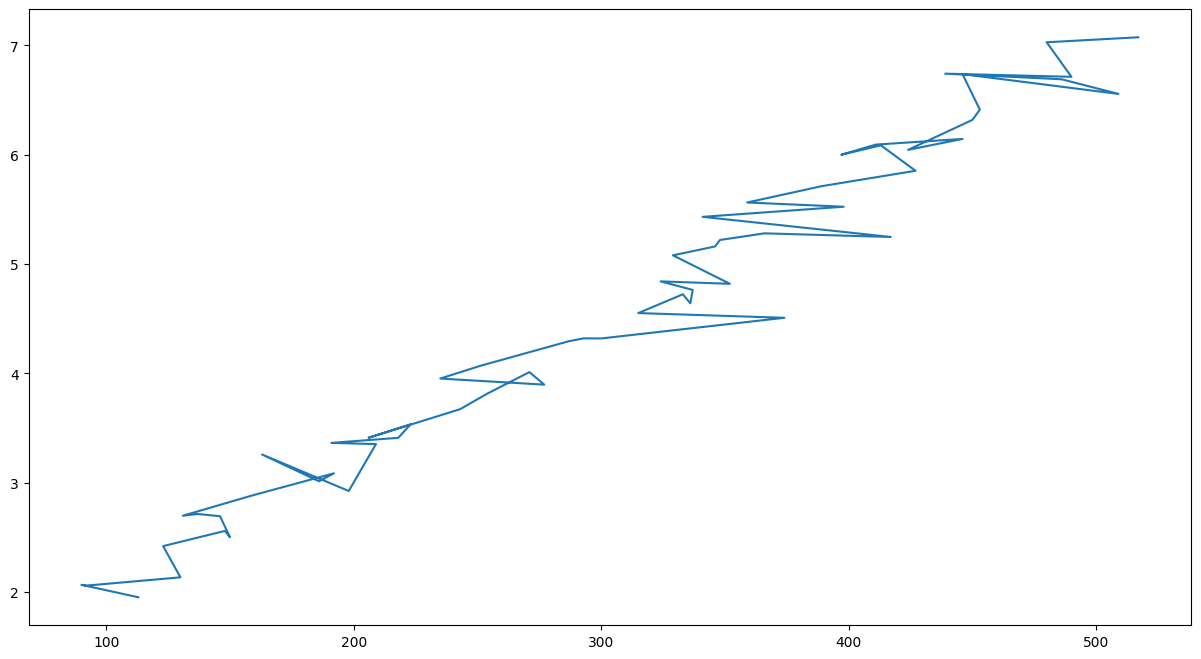

In [119]:
plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])
plt.plot(df['Visitantes Únicos'], df['Taxa de Conversão (%)'])

Text(0.5, 0, 'Data')

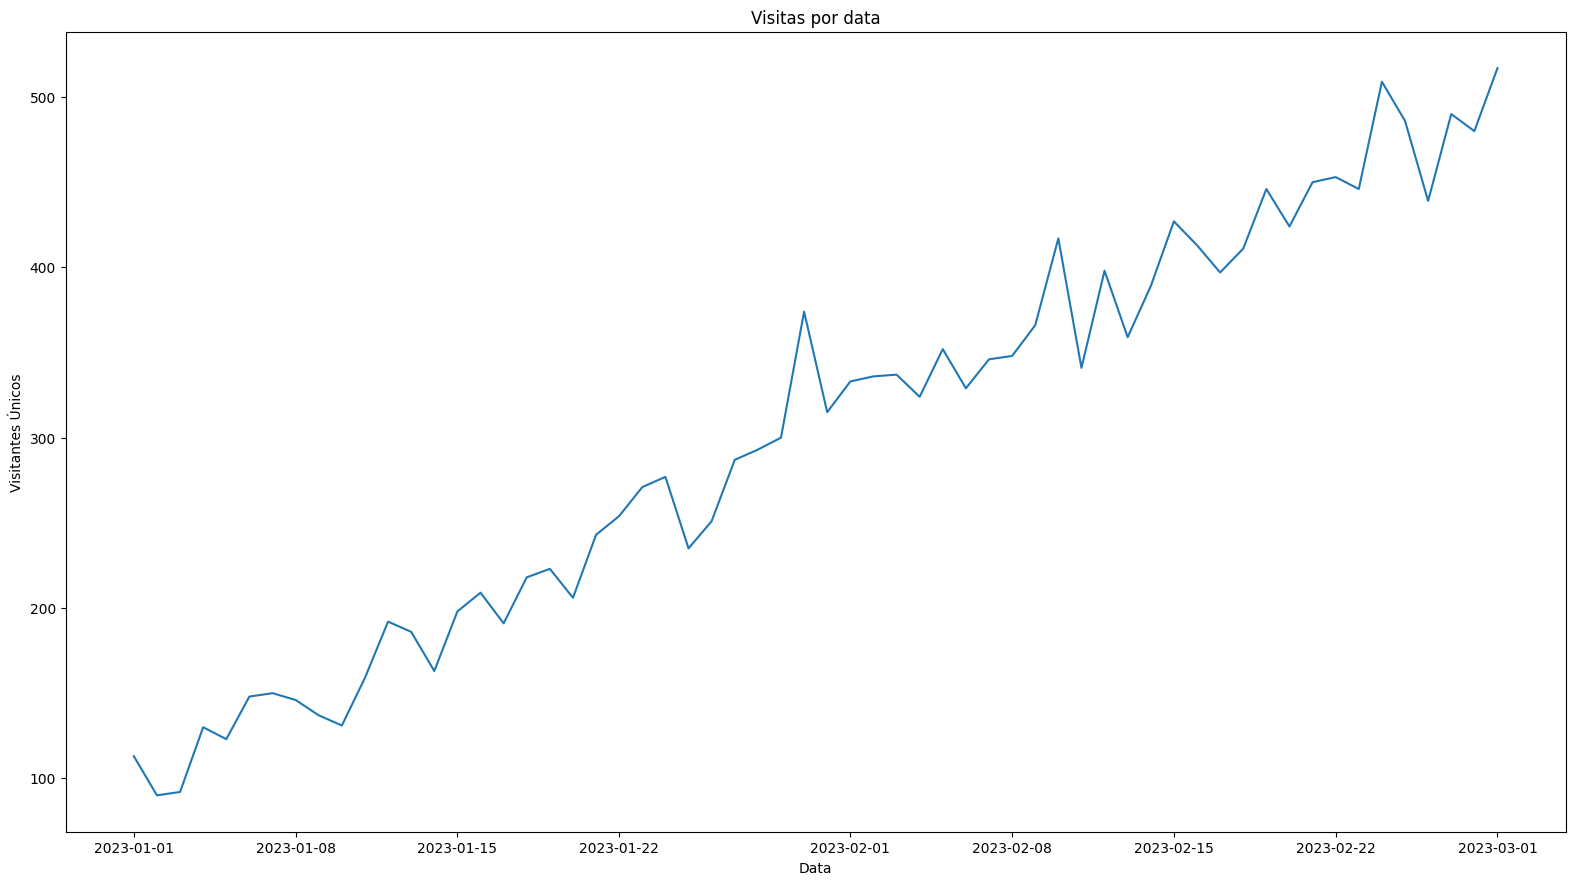

In [120]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(df['Data'], df['Visitantes Únicos'])
eixo.set_title('Visitas por data')
eixo.set_ylabel('Visitantes Únicos')
eixo.set_xlabel('Data')

### Questão 2

**Simulação de Monte Carlo**: Implemente uma simulação de Monte Carlo para avaliar os possíveis efeitos de um novo redesign na plataforma. Analise como diferentes variáveis podem impactar os resultados e discuta os cenários que esta simulação pode prever, ajudando a empresa a tomar decisões mais informadas sobre o redesign.

In [132]:
import random

min_melhoria = 0.05
max_melhoria = 0.15

num_simulacoes = 1000

resultados = []

for i in range(num_simulacoes):
  melhoria = random.uniform(min_melhoria, max_melhoria)

  taxa_nova_conversão = df['Taxa de Conversão (%)'].mean() * (1 + melhoria)
  conversoes_adicionais = taxa_nova_conversão * df['Visitantes Únicos'].sum() - df['Taxa de Conversão (%)'].mean() * df['Visitantes Únicos'].sum()

  resultados.append(conversoes_adicionais)
  media_conversoes = sum(resultados) / num_simulacoes

print(f"Média do numéro de conversões adicionais: {media_conversoes}")


Média do numéro de conversões adicionais: 8060.4234560156365


### Questão 3

**Análise de Sensibilidade**: Realize uma análise de sensibilidade para examinar como alterações em diferentes variáveis de entrada afetam as previsões da taxa de conversão.

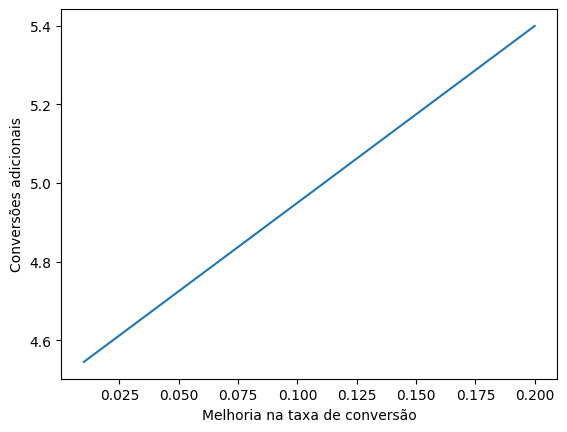

In [139]:
def calcular_nova_taxa_de_conversao(melhoria):
  return df['Taxa de Conversão (%)'].mean() * (1 + melhoria)

def calcular_conversoes_adicionais(melhoria):
  taxa_de_nova_conversao = calcular_nova_taxa_de_conversao(melhoria)
  return taxa_de_nova_conversao * df['Visitantes Únicos'].sum() - df['Taxa de Conversão (%)'].mean() * df['Visitantes Únicos'].sum()

valores_melhoria = np.linspace(0.01, 0.2, 10)

resultado = []

for melhoria in valores_melhoria:

  taxa_de_nova_conversao = calcular_nova_taxa_de_conversao(melhoria)
  conversoes_adicionais = calcular_conversoes_adicionais(melhoria)

  resultado.append({
    'melhoria': melhoria,
    'taxa_de_nova_conversao': taxa_de_nova_conversao,
    'conversoes_adicionais': conversoes_adicionais
  })

df_results = pd.DataFrame(resultado)

sns.lineplot(data=df_results, x='melhoria', y='taxa_de_nova_conversao')
plt.xlabel('Melhoria na taxa de conversão')
plt.ylabel('Conversões adicionais')
plt.show()


## Entrega

Siga esses passos para entregar sua prova.

1. Crie um repositório no GitHub para essa entrega.

2. Submeta seu desenvolvimento neste repositório.

3. Garanta que o repositório é publicamente acessível (eliminatório).

4. No Google forms da prova, submeta a URL do repositório.